# Logistic Regression - Lead Scoring Case Study 


## Problem Statement


X Education is an online education company that provides courses to industry professionals. The company employs marketing channels, such as Google search engines and websites, to attract leads to their platform. Once on the platform, leads can browse through the available courses or fill out a form to learn more information. These leads can also come through referrals.

The sales team at X Education works to convert the acquired leads into paying customers. However, despite many leads, the company's conversion rate is only around 30%. In order to increase the conversion rate, X Education needs a model to prioritize leads for the sales team to focus on. The CEO has set a target conversion rate of 80%.

## Objective:

To achieve the CEO's goal of an 80% conversion rate, X Education needs a lead scoring model. The model will assign a score between 0 and 100 to each lead based on their likelihood of conversion. Leads with higher scores will be considered more promising and will be prioritized by the sales team. The model will take into account data such as browsing behavior, form fill-ups, video views, and past referrals to calculate the score.

The model will be built using logistic regression, and will provide a way for the sales team to focus their efforts on leads that are most likely to convert. By prioritizing the leads with higher scores, the company hopes to increase the conversion rate and achieve the CEO's target.

In [1]:
# importing necessery libraries 

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 

import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE 
from sklearn import metrics 
from sklearn.metrics import precision_recall_curve

In [2]:
# to display max rows and columns 
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [3]:
# import warnings 

import warnings 
warnings.filterwarnings('ignore')

## Step 1 : Data Understanding, Cleaning and Preparation

In [4]:
# read the data 
leads_df = pd.read_csv('Leads.csv')
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Let's check the dimensions of the dataframe
leads_df.shape

(9240, 37)

In [6]:
# let's look at the statistical aspects of the dataframe
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Let's see the type of each column
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
#checking for duplicates
leads_df[leads_df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


There are no data duplicates found.

### Exploaratory Data Analysis

In [9]:
# Drop 'Prospect ID' and 'Lead Number' columns as they just act as unique identifiers
leads_df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)


## Handling missing values

In [10]:
#Replace 'select' values with nulls in select category variables to treat them as missing values.

leads_df = leads_df.replace('Select', np.nan)

In [11]:
# percentage of missing values 
round(leads_df.isnull().mean(), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.27
Specialization                                   0.37
How did you hear about X Education               0.78
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [12]:
# dropping the columns if the percentage of missing values is more than 45% 


# Loop through each column in the DataFrame
for col in leads_df.columns:
    # Check if the percentage of missing values in the column is greater than 45%
    if leads_df[col].isnull().mean() > 0.45:
        # If it is, drop the column from the DataFrame
        leads_df.drop(col, axis=1, inplace=True)

In [13]:
# percentage of missing values 
round(leads_df.isnull().mean(), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.27
Specialization                                   0.37
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

Analysing 'Country' variable

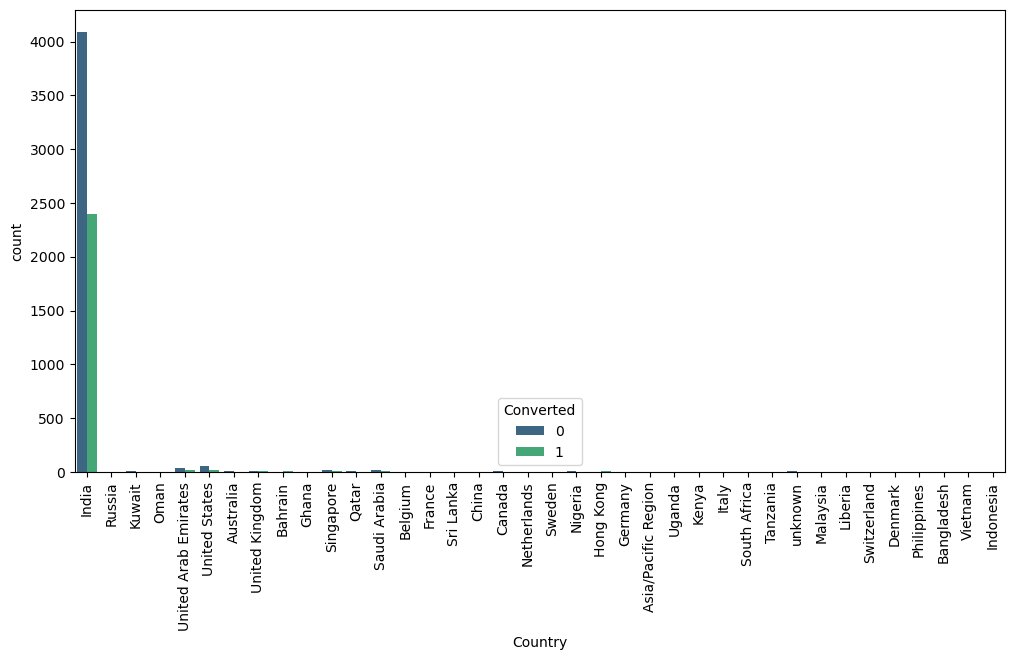

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(x='Country', hue='Converted', data=leads_df, palette='viridis')
plt.xticks(rotation=90)
plt.show()

In [15]:
#Dropping the 'Country' column as most visitors are from India and it is least helpful in analysis
leads_df.drop(columns='Country', axis=1, inplace=True)

 Analysing 'City' variable

In [16]:
leads_df['City'].value_counts(dropna = False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [17]:
# imputing null values with mode (Mumbai)

leads_df['City'] = leads_df['City'].replace(np.nan, 'Mumbai')

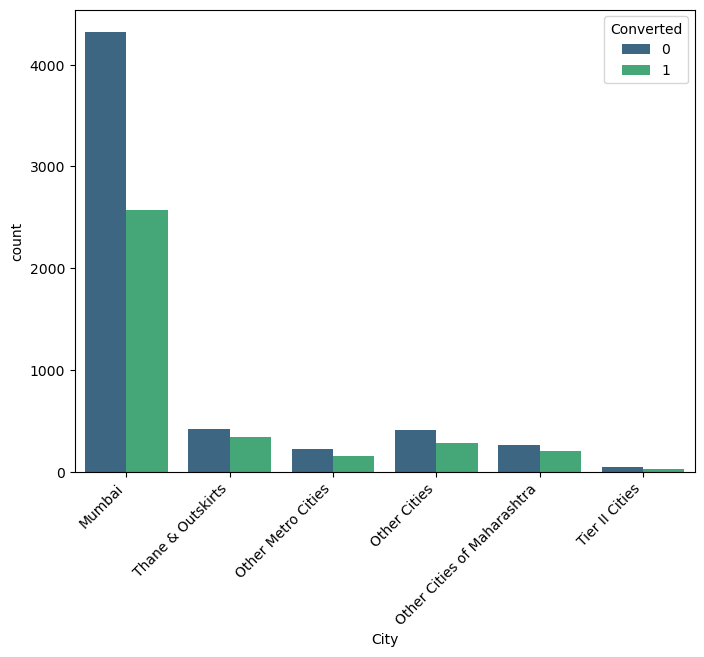

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='City', hue='Converted', data=leads_df, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.show()


Analysing 'Specialization' variable

In [19]:
leads_df['Specialization'].value_counts(dropna = False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [20]:
# imputing null values of 'Specialization' with 'UnSpecified' category for those 

leads_df['Specialization'] = leads_df['Specialization'].replace(np.nan, 'Unspecified')

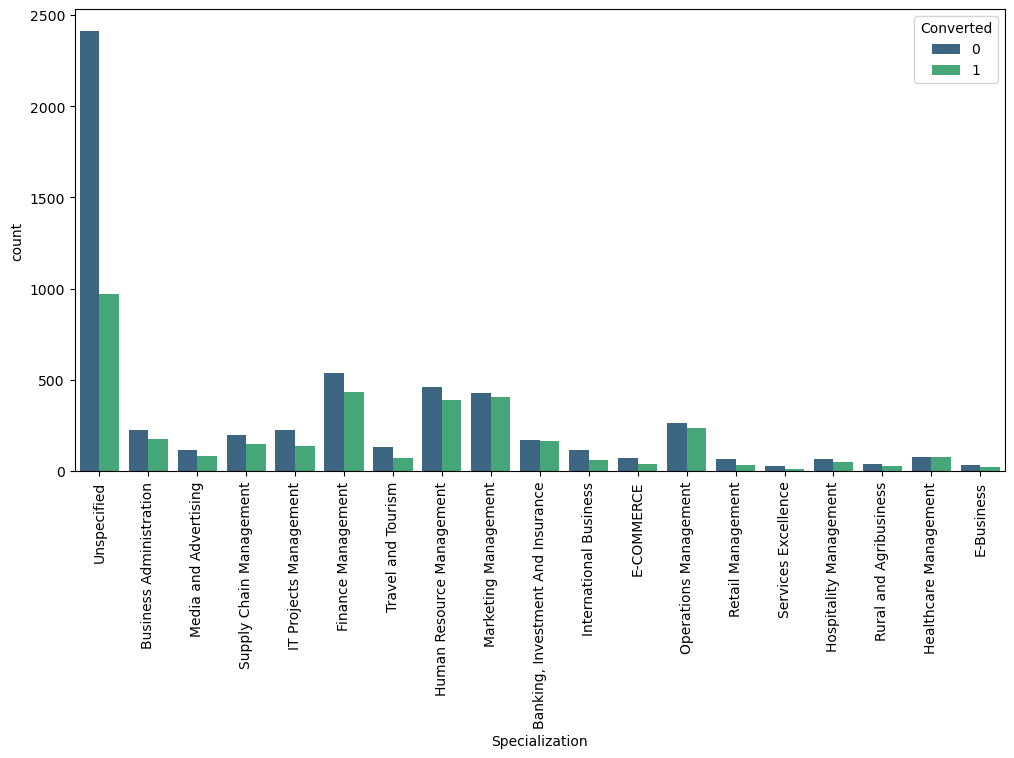

In [21]:
plt.figure(figsize = (12, 6))
sns.countplot(leads_df.Specialization, hue = leads_df.Converted, palette='viridis')
plt.xticks(rotation = 90)
plt.show()

In [22]:
## "Combining Related managment Specializations into 'Management' Category for Better Analysis"

leads_df['Specialization'] = leads_df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management')

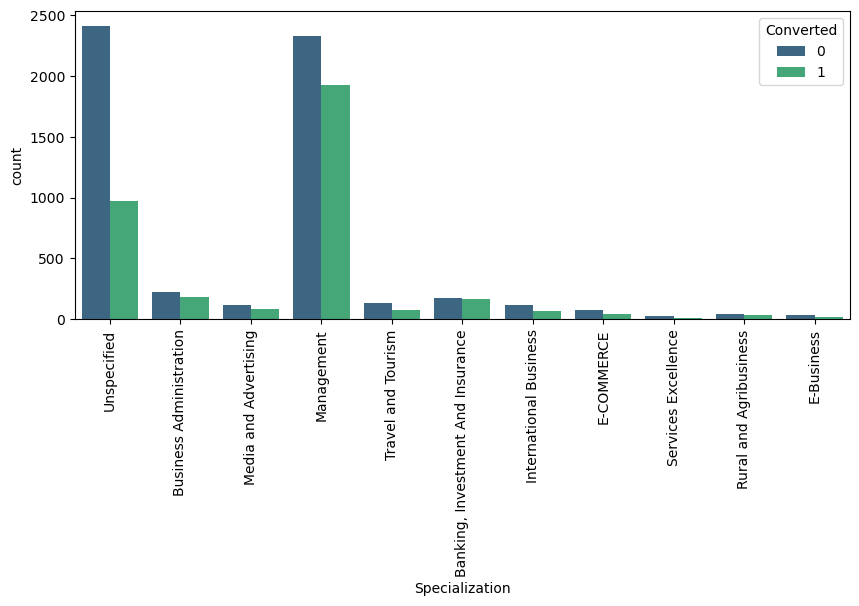

In [23]:
plt.figure(figsize = (10, 4))
sns.countplot(leads_df.Specialization, hue = leads_df.Converted, palette='viridis')
plt.xticks(rotation = 90)
plt.show()

Analysing 'what is your current occupation' variable

In [24]:
leads_df['What is your current occupation'].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [25]:
# replacing null values with Unemployed

leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(np.nan, 'Unemployed')

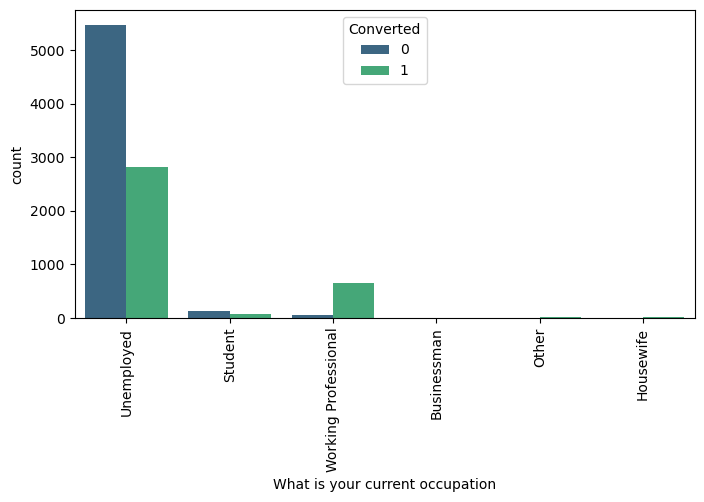

In [26]:
plt.figure(figsize = (8, 4))
sns.countplot(leads_df['What is your current occupation'], hue = leads_df.Converted, palette='viridis')
plt.xticks(rotation = 90)
plt.show()

Working professionals are more likely to enrol in this course, as can be seen. 



Analysing 'What matters most to you in choosing a course' variable

In [27]:
leads_df['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [28]:
# replacing NaN with Better career prospects
leads_df['What matters most to you in choosing a course'] = leads_df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

 we could see that a large majority of the data falls under the category of 'Better career prospects', indicating that this variable may not provide much useful insight for analysis. Therefore, it may be appropriate to consider dropping this variable.

In [29]:
leads_df.drop('What matters most to you in choosing a course', axis = 1, inplace = True)

Analysing 'Tags' variable

In [30]:
leads_df['Tags'].value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [31]:
# replacing null values with the seperate category 'UnSpecified' 
leads_df['Tags'] = leads_df['Tags'].replace(np.nan,'UnSpecified')

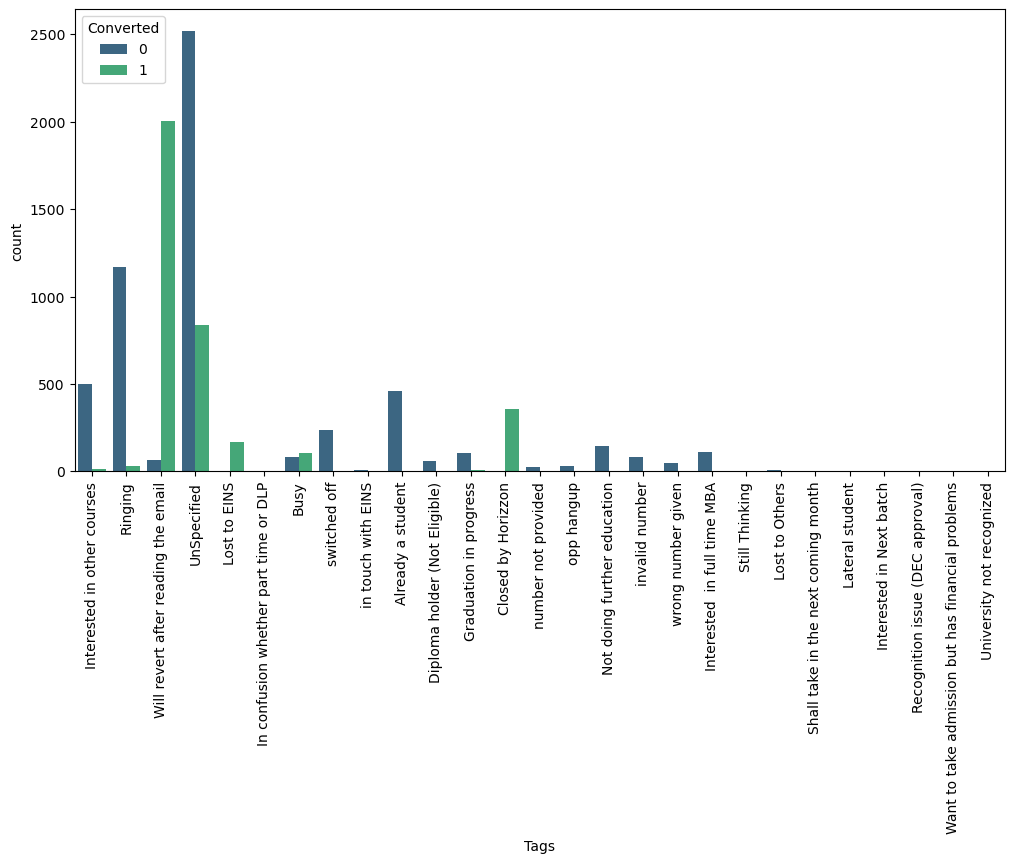

In [32]:
plt.figure(figsize = (12, 6))
sns.countplot(leads_df['Tags'], hue = leads_df.Converted, palette='viridis')
plt.xticks(rotation = 90)
plt.show()

In [33]:
#replacing tags with low frequency with "Other Tags"

leads_df['Tags'] = leads_df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                  'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                  'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                  'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                  'University not recognized', 'switched off', 'Already a student',
                                  'Not doing further education', 'invalid number', 'wrong number given',
                                  'Interested  in full time MBA' ], 'Other_Tags')


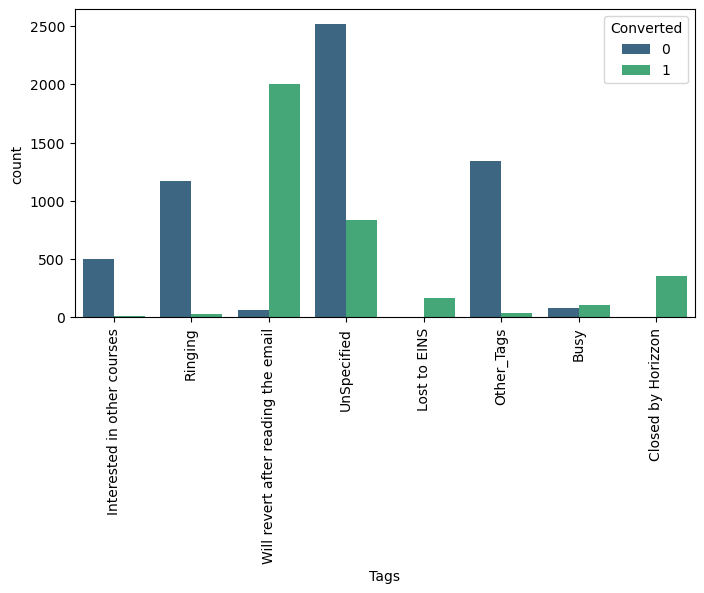

In [34]:
plt.figure(figsize = (8, 4))
sns.countplot(leads_df['Tags'], hue = leads_df.Converted, palette='viridis')
plt.xticks(rotation = 90)
plt.show()

The data suggests that visitors marked as 'Will revert after reading the email' are more likely to be converted into leads.





In [35]:
# percentage of missing values 
round(leads_df.isnull().mean(), 2)

Lead Origin                                 0.00
Lead Source                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 0.01
Total Time Spent on Website                 0.00
Page Views Per Visit                        0.01
Last Activity                               0.01
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                                        0.00
Update me on Supply 

Analysing 'Last Activity variable'

In [36]:
leads_df['Last Activity'].value_counts(dropna = False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [37]:
# replacing NaN with seperate categry 'Others'
leads_df['Last Activity'] = leads_df['Last Activity'].replace(np.nan, 'Others')

# replacing low frequency values with 'Others'
leads_df['Last Activity'] = leads_df['Last Activity'].replace(['Unreachable','Unsubscribed', 'Had a Phone Conversation', 
                                                   'Approached upfront', 'View in browser link Clicked',       
                                                   'Email Marked Spam', 'Email Received','Resubscribed to emails',
                                                   'Visited Booth in Tradeshow'], 'Others')


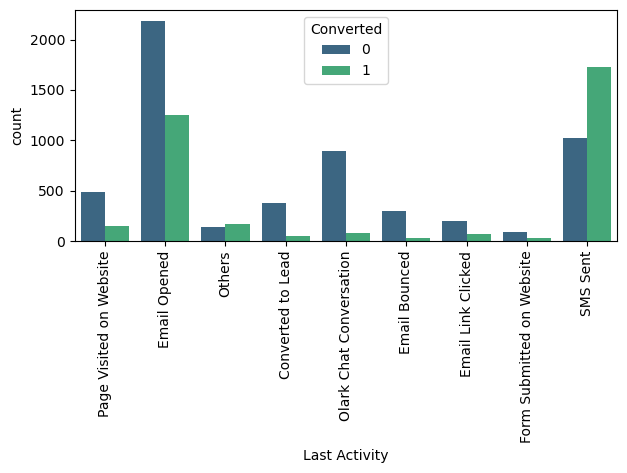

In [38]:
plt.figure(figsize = (7, 3))
sns.countplot(leads_df['Last Activity'], hue = leads_df.Converted, palette='viridis')
plt.xticks(rotation = 90)
plt.show()

The data shows that visitors categorized under 'SMS Sent' are highly likely to be converted as learners

In [39]:
# percentage of missing values 
round(leads_df.isnull().mean(), 2)

Lead Origin                                 0.00
Lead Source                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 0.01
Total Time Spent on Website                 0.00
Page Views Per Visit                        0.01
Last Activity                               0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                                        0.00
Update me on Supply 

Since the percentage of missing values in the dataset is less than 2%, we can drop the rows containing null values.

In [40]:
leads_df = leads_df.dropna()

In [41]:
# percentage of missing values 
round(leads_df.isnull().mean(), 2)

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                        0.0
Update me on Supply Chain Content       

Let's examine some of the other categorical variables.


Analysing 'Lead Source' variable

In [42]:
leads_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [43]:
# replacing 'Facebook' by 'Social Media' as 'Facebook' is a subset of 'Social Media'
leads_df['Lead Source'] = leads_df['Lead Source'].replace('Facebook','Social Media')

In [44]:
# replacing 'google' with 'Google' as it is just a typo and the meaning is same
leads_df['Lead Source'] = leads_df['Lead Source'].replace('google','Google')

In [45]:
# replacing all other low frequency values with seperate category 'Others'
leads_df['Lead Source'] = leads_df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')     

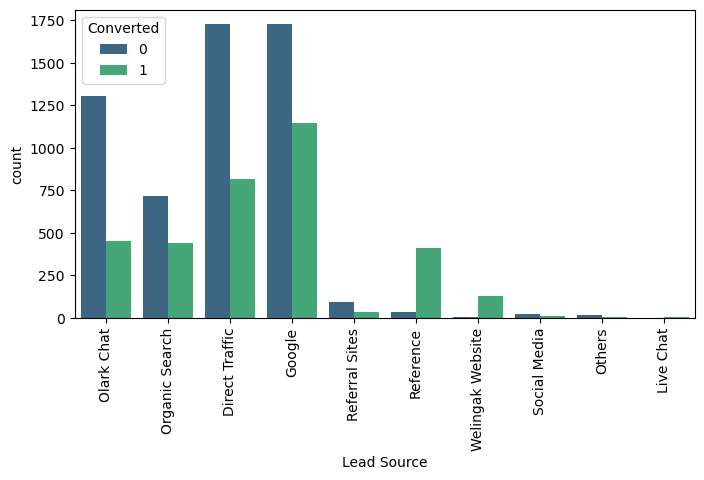

In [46]:
plt.figure(figsize = (8, 4))
sns.countplot(leads_df['Lead Source'], hue = leads_df.Converted, palette='viridis')
plt.xticks(rotation = 90)
plt.show()

"Visitors mapped under 'Reference' for 'Lead Source' have higher chances of conversion."

Analysing 'Lead Origin' variable

In [47]:
leads_df['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

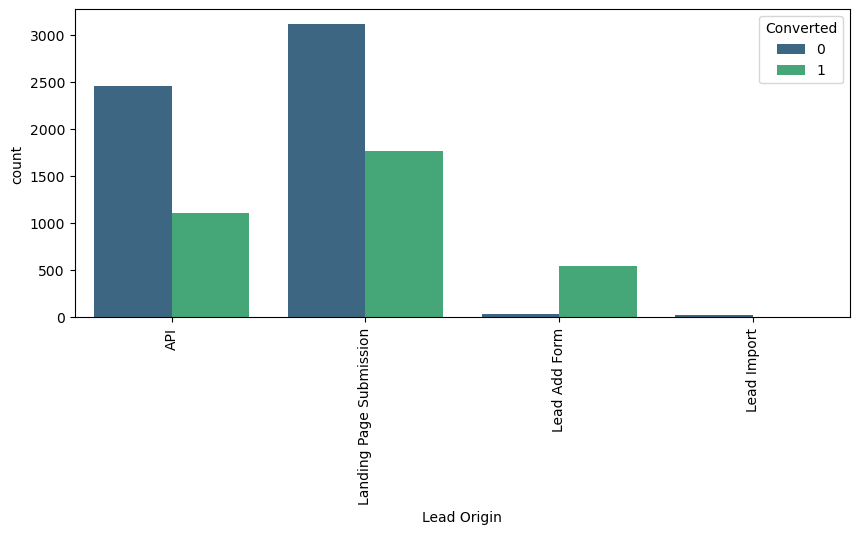

In [48]:
plt.figure(figsize = (10, 4))
sns.countplot(leads_df['Lead Origin'], hue = leads_df.Converted, palette='viridis')
plt.xticks(rotation = 90)
plt.show()

API and Landing Page Submission are effective in generating a higher number of leads and conversions, while Lead Add Form has a higher conversion rate but generates a relatively lower number of leads.




Analysing 'Last Notable Activity' variable

In [49]:
leads_df['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [50]:
#clubbing lower frequency values

leads_df['Last Notable Activity'] = leads_df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

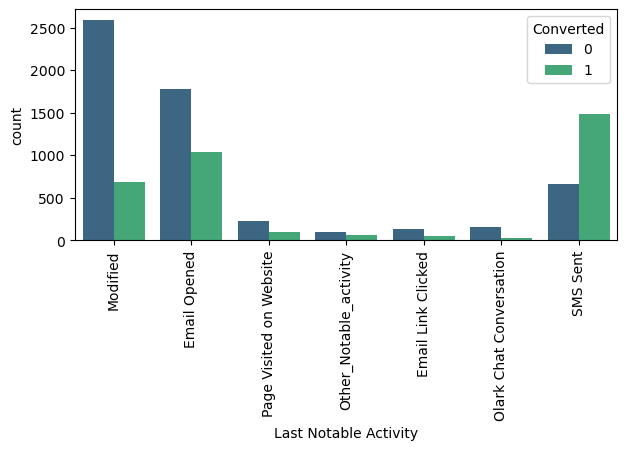

In [51]:
plt.figure(figsize = (7, 3))
sns.countplot(leads_df['Last Notable Activity'], hue = leads_df.Converted, palette='viridis')
plt.xticks(rotation = 90)
plt.show()

In [52]:
# lets analyse categorical variables 

for i in leads_df.columns:
    print(round(leads_df[i].astype('category').value_counts(), 2))
    print('------------------------------------------------')

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64
------------------------------------------------
Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Social Media          33
Others                19
Live Chat              2
Name: Lead Source, dtype: int64
------------------------------------------------
No     8358
Yes     716
Name: Do Not Email, dtype: int64
------------------------------------------------
No     9072
Yes       2
Name: Do Not Call, dtype: int64
------------------------------------------------
0    5639
1    3435
Name: Converted, dtype: int64
------------------------------------------------
0.0      2161
2.0      1679
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      

In [53]:
#Dropping columns with mostly 'No' values as they are not informative for analysis
columns_to_drop = ['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
                  'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
                   'Update me on Supply Chain Content', 'Get updates on DM Content',
                   'I agree to pay the amount through cheque']
leads_df = leads_df.drop(columns_to_drop, axis=1)

In [54]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  Tags                                    9074 non-null   obje

#### Analysing numerical variables and handling outliers 

In [55]:
# creating a list of numerical variables
numerical_variables_list = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

Analysing 'TotalVisits' variable

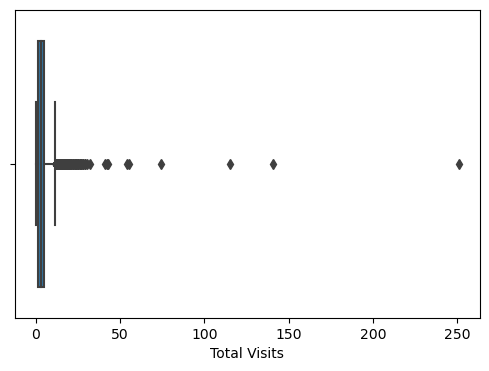

In [56]:
plt.figure(figsize=(6,4))
sns.boxplot(x=leads_df['TotalVisits'])
plt.xlabel('Total Visits')
plt.show()


In [57]:
leads_df['TotalVisits'].describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [58]:
# finding lower_bound and upper_bound

q1 = 1 
q3 = 5 
iqr = q3 - q1 
lower_bound = q1 - 1.5 * iqr 
upper_bound = q3 + 1.5 * iqr
print(lower_bound, upper_bound)

-5.0 11.0


In [59]:
# capping the extreme upper values to upper_bound and extreme lower values to lower_bound 

leads_df['TotalVisits'] = np.where(leads_df['TotalVisits'] > upper_bound, upper_bound, leads_df['TotalVisits'])
leads_df['TotalVisits'] = np.where(leads_df['TotalVisits'] < lower_bound, lower_bound, leads_df['TotalVisits'])

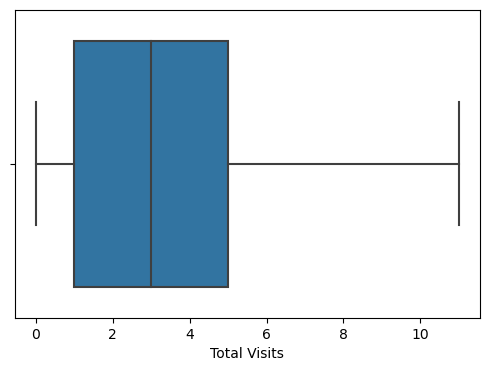

In [60]:
plt.figure(figsize=(6,4))
sns.boxplot(x=leads_df['TotalVisits'])
plt.xlabel('Total Visits')
plt.show()

Analysing 'Total Time Spent on Website' variable

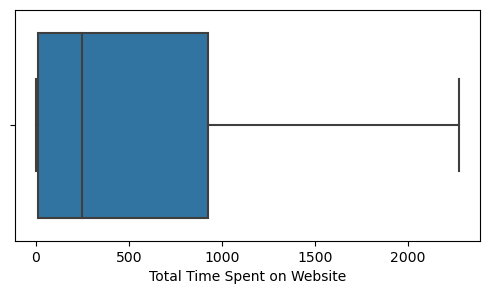

In [61]:
plt.figure(figsize=(6,3))
sns.boxplot(x=leads_df['Total Time Spent on Website'])
plt.show()

Analysing 'Page Views Per Visit' variable

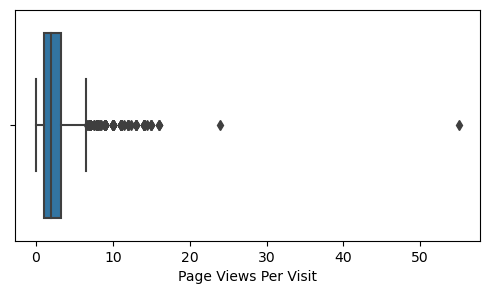

In [62]:
plt.figure(figsize=(6,3))
sns.boxplot(x=leads_df['Page Views Per Visit'])
plt.show()

In [63]:
leads_df['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [64]:
# finding lower_bound and upper_bound

q1 = 1 
q3 = 3
iqr = q3 - q1 
lower_bound = q1 - 1.5 * iqr 
upper_bound = q3 + 1.5 * iqr
print(lower_bound, upper_bound)

-2.0 6.0


In [65]:
# capping the extreme upper values to upper_bound and extreme lower values to lower_bound

leads_df['Page Views Per Visit'] = np.where(leads_df['Page Views Per Visit'] > upper_bound, upper_bound, leads_df['Page Views Per Visit'])
leads_df['Page Views Per Visit'] = np.where(leads_df['Page Views Per Visit'] < lower_bound, lower_bound, leads_df['Page Views Per Visit'])

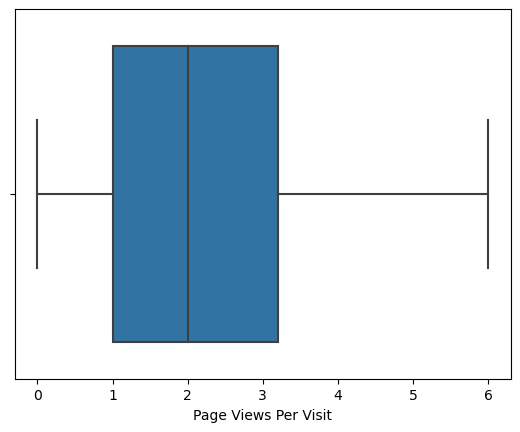

In [66]:
sns.boxplot(leads_df['Page Views Per Visit'])
plt.show()

lets check the converted percentage 

In [67]:
round(sum(leads_df['Converted']) / len(leads_df), 2)

0.38

As a result 38% of visitors convert and take a coarse 

####  Data Visualisation

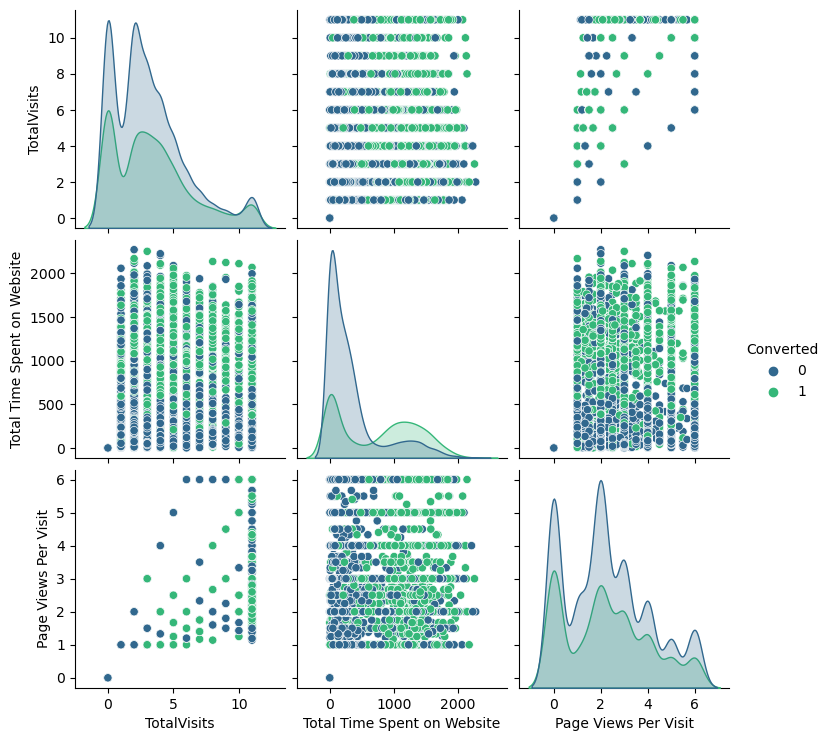

In [68]:
# analysing numerical variables 

sns.pairplot(leads_df, hue = 'Converted', palette='viridis')
plt.show()

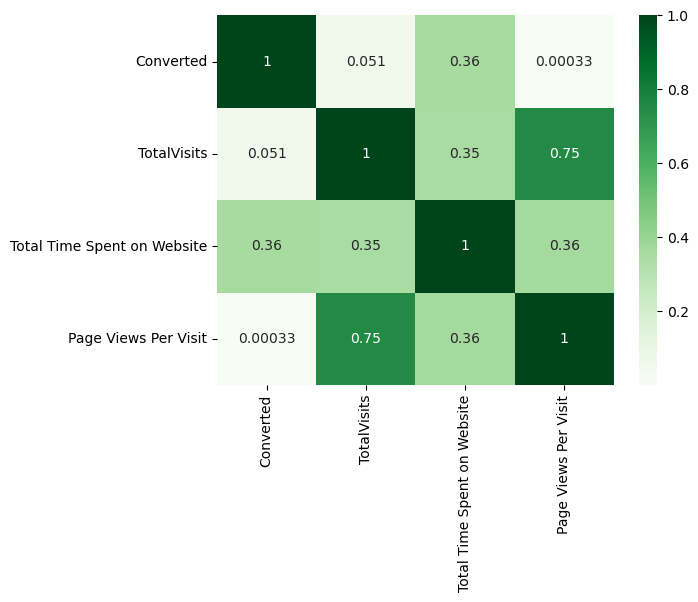

In [69]:
sns.heatmap(leads_df.corr(), annot = True, cmap = 'Greens')
plt.show()

The variable 'TotalVisits' is strongly correlated with 'Pages Views Per Visit', which could impact our analysis. Meanwhile, 'Total Time Spent on Website' has a positive correlation with the target variable 'Converted', while 'TotalVisits' has the weakest correlation with it.

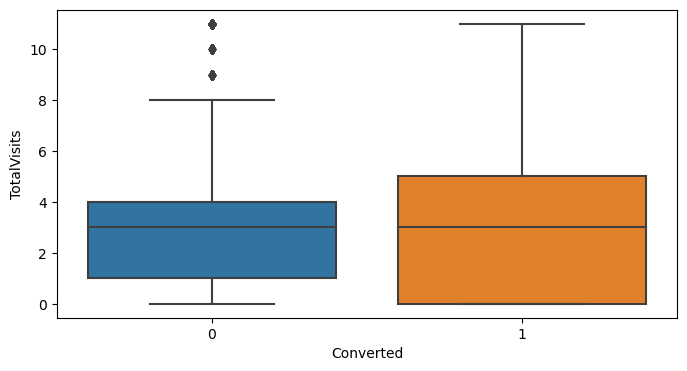

In [70]:
plt.figure(figsize=(8,4))
sns.boxplot(x = leads_df.Converted, y = leads_df.TotalVisits)
plt.show()

Although the median is the same, the upper limit is much higher for visitors who converted to learners. This suggests that visitors who frequently visit the page are more likely to convert.

Analysing 'Total Time Spent on Website' variable

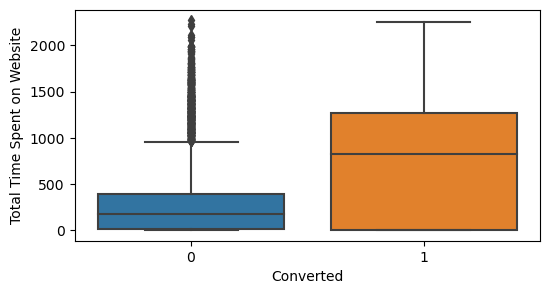

In [71]:
plt.figure(figsize=(6,3))
sns.boxplot(x = leads_df.Converted, y = leads_df['Total Time Spent on Website'])
plt.show()

It's evident that visitors who spend more time on the website are more likely to become learners.

Analysing 'Page Views Per Visit' vs 'Converted' variable

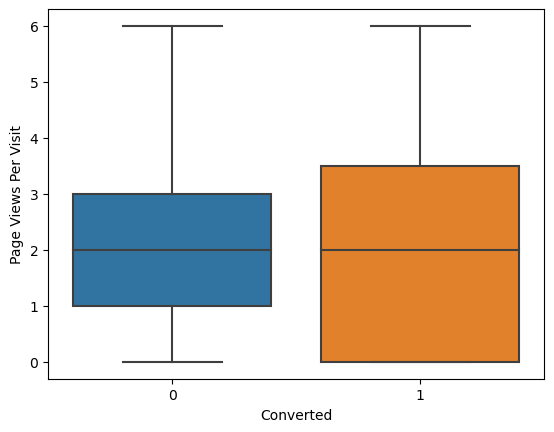

In [72]:
sns.boxplot(x = leads_df.Converted, y = leads_df['Page Views Per Visit'])
plt.show()

Since the median is the same for both, no conclusions can be drawn from this information alone

#### Creating dummy variables

lets look at all the categorical variables present in the dataset 

In [73]:
cat_cols = leads_df.loc[:, leads_df.dtypes == 'object']
cat_cols.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [74]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unspecified,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unspecified,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unspecified,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [75]:
# lets create a list of variables for whose values needs to be mapped ('No' : 0, 'Yes' : 1)

map_list = ['Do Not Email', 'A free copy of Mastering The Interview']

for col in map_list:
    leads_df[col] = leads_df[col].map({'No' : 0, 'Yes' : 1})

In [76]:
leads_df.head(10)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unspecified,Unemployed,Interested in other courses,Mumbai,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unspecified,Unemployed,Ringing,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unspecified,Unemployed,Will revert after reading the email,Mumbai,0,Modified
5,API,Olark Chat,0,0,0.0,0,0.0,Olark Chat Conversation,Unspecified,Unemployed,UnSpecified,Mumbai,0,Modified
6,Landing Page Submission,Google,0,1,2.0,1640,2.0,Email Opened,Management,Unemployed,Will revert after reading the email,Mumbai,0,Modified
7,API,Olark Chat,0,0,0.0,0,0.0,Olark Chat Conversation,Unspecified,Unemployed,UnSpecified,Mumbai,0,Modified
8,Landing Page Submission,Direct Traffic,0,0,2.0,71,2.0,Email Opened,Management,Unemployed,UnSpecified,Thane & Outskirts,1,Email Opened
9,API,Google,0,0,4.0,58,4.0,Email Opened,Management,Unemployed,UnSpecified,Mumbai,0,Email Opened


In [77]:
# creating dummy variables and dropping the first category of each
dummy1 = pd.get_dummies(leads_df[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

# merging the data with original dataframe
leads_df = pd.concat([leads_df,dummy1],1)

In [78]:
# creating dummy variables for 'Specialization' variable and manually dropping 'UnSpecified' category

dummy2 = pd.get_dummies(leads_df['Specialization'], prefix = 'Specialization')
dummy2 = dummy2.drop('Specialization_Unspecified', 1)

leads_df = pd.concat([leads_df, dummy2], 1)

In [79]:
# creating dummy variables for 'Lead Source' variable and manually dropping 'Others' category

dummy3 = pd.get_dummies(leads_df['Lead Source'], prefix  = 'Lead Source')
dummy3 = dummy3.drop(['Lead Source_Others'], 1)
leads_df = pd.concat([leads_df, dummy3], axis = 1)

In [80]:
# creating dummy variables for 'Last Activity' variable and manually dropping 'Others' category

dummy4 = pd.get_dummies(leads_df['Last Activity'], prefix  = 'Last Activity')
dummy4 = dummy4.drop(['Last Activity_Others'], 1)
leads_df = pd.concat([leads_df, dummy4], axis = 1)

In [81]:
# creating dummy variables for 'Last Notable Activity' variable and manually dropping 'Other_Notable_activity' category

dummy5 = pd.get_dummies(leads_df['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy5 = dummy5.drop(['Last Notable Activity_Other_Notable_activity'], 1)
leads_df = pd.concat([leads_df, dummy5], axis = 1)

In [82]:
# creating dummy variables for 'Tags' variable and manually dropping 'Not Specified' category

dummy6 = pd.get_dummies(leads_df['Tags'], prefix  = 'Tags')
dummy6 = dummy6.drop(['Tags_UnSpecified'], 1)
leads_df = pd.concat([leads_df, dummy6], axis = 1)

In [83]:
# dropping redundant columns 
leads_df.drop(cat_cols, axis = 1, inplace = True)

In [84]:
leads_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [85]:
leads_df.shape

(9074, 57)

### Step 2 : Train - Test Split and Scaling

In [86]:
X = leads_df.drop('Converted', 1)
y = leads_df['Converted']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

In [88]:
X_train.shape

(6351, 56)

#### scaling

In [89]:
numerical_variables_list

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [90]:
# instantiate an object 
scaler = StandardScaler()

X_train[numerical_variables_list] = scaler.fit_transform(X_train[numerical_variables_list])

In [91]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
3009,-0.431325,-0.160255,-0.155018,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,-0.431325,-0.540048,-0.155018,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,-1.124566,-0.888650,-1.265540,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
4750,-0.431325,1.643304,-0.155018,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
7987,0.608537,2.017593,0.122613,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0


### Step 3 : Model Building 

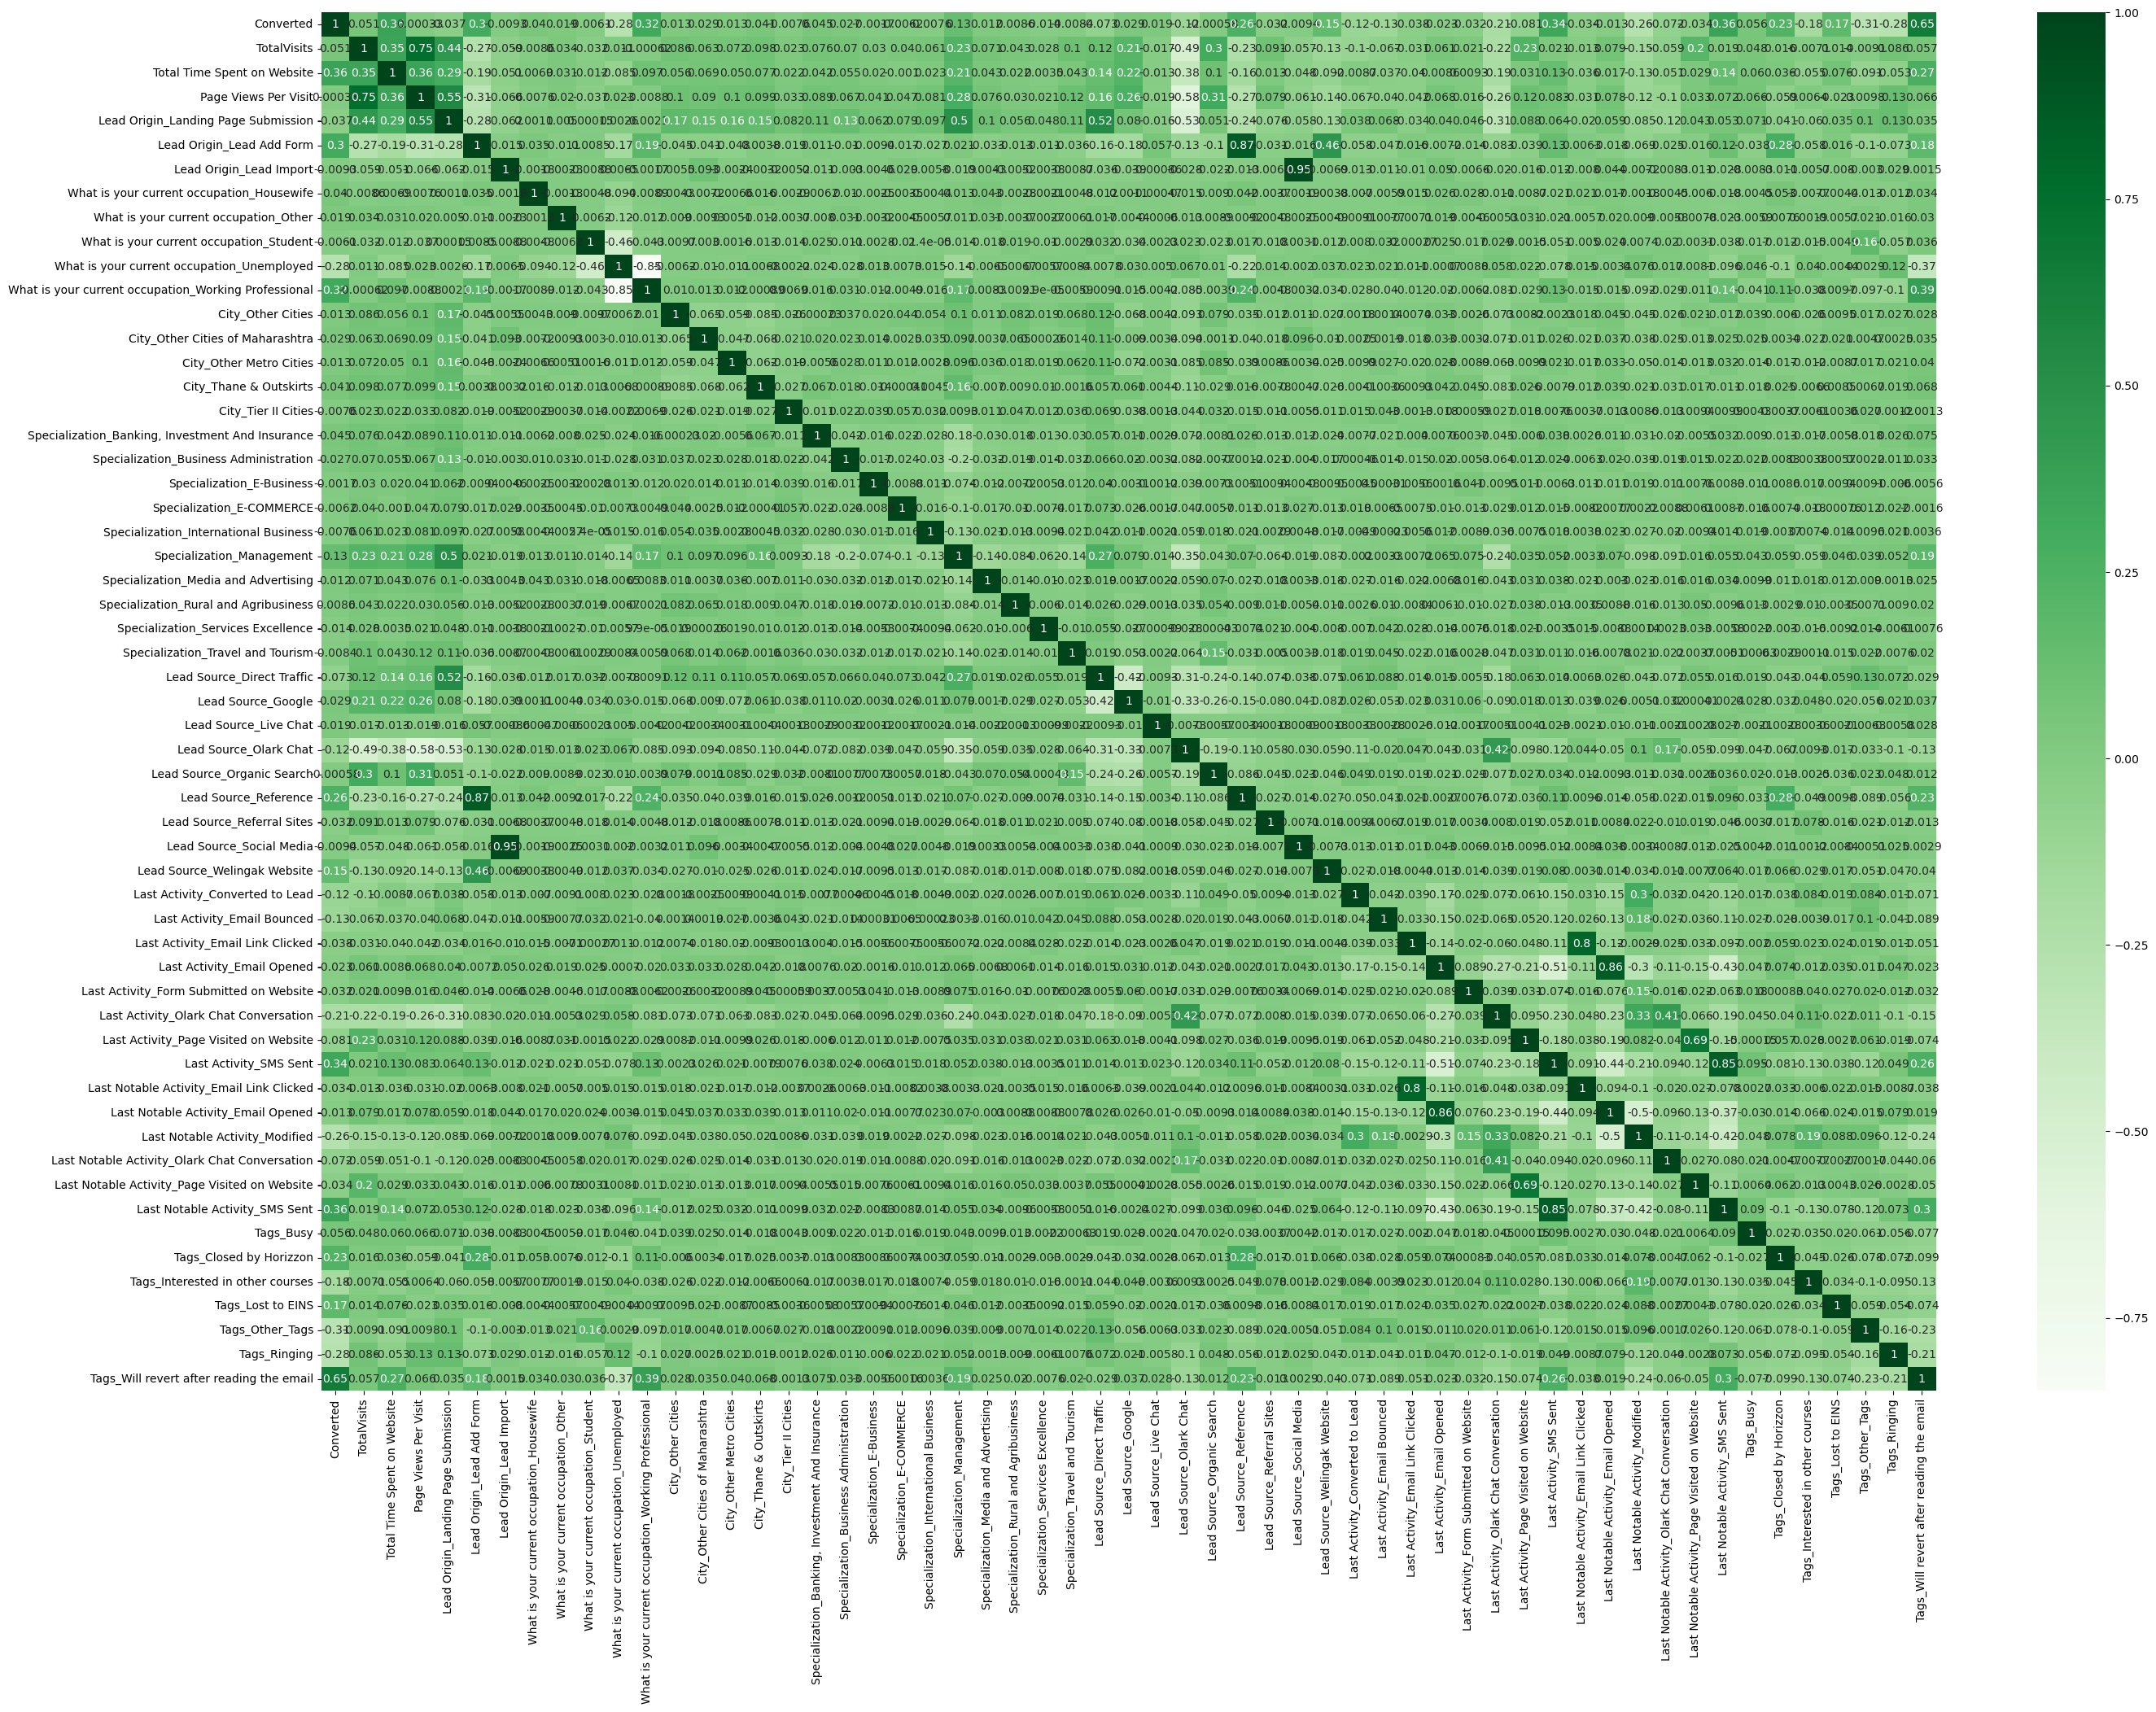

In [92]:
# looking at the correlation

plt.figure(figsize = (32,22))
sns.heatmap(leads_df.corr(), annot = True, cmap = 'Greens')
plt.show()

We were unable to examine the correlation in detail for the entire dataset due to the large number of variables.

#### Coarse tuning using RFE

In [93]:
# instatiate an object 

lr = LogisticRegression()

rfe = RFE(lr, n_features_to_select= 15) # selecting 15 top most variables 

rfe = rfe.fit(X_train, y_train)

In [94]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 23),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 6),
 ('What is your current occupation_Housewife', False, 31),
 ('What is your current occupation_Other', False, 40),
 ('What is your current occupation_Student', False, 9),
 ('What is your current occupation_Unemployed', False, 7),
 ('What is your current occupation_Working Professional', False, 28),
 ('City_Other Cities', False, 34),
 ('City_Other Cities of Maharashtra', False, 37),
 ('City_Other Metro Cities', False, 36),
 ('City_Thane & Outskirts', False, 24),
 ('City_Tier II Cities', False, 29),
 ('Specialization_Banking, Investment And Insurance', False, 12),
 ('Specialization_Business Administration', False, 32),
 ('Specialization_E-Business', False, 33),
 ('Specialization_E-COMMERCE', False, 14),
 ('Specialization_International Business', False

In [95]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

#### Fine tuning using VIF and p-value

#### Model 1

In [96]:
# adding constant 
X_train_sm = sm.add_constant(X_train[col])

# instantiating an object
lr = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

# fitting the data
res = lr.fit()

# statistical summary of the data
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1167.3
Date:                Tue, 18 Apr 2023   Deviance:                       2334.6
Time:                        13:11:31   Pearson chi2:                 8.29e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6192
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1771      0.129     -9.160      0.000      -1.429      -0.925
Total Time Spent on Website                       1.1632      0.064     18.174      0.000       1.038       1.289
Lead Origin_Landing Page Submission              -0.8884      0.139     -6.397      0.000      -1.161      -0.616
Lead Origin_Lead Add Form                         1.3285      0.481      2.762      0.006       0.386       2.271
Lead Source_Olark Chat                            0.8748      0.171      5.112      0.000       0.539       1.210
Lead Source_Welingak Website                      3.8150      0.868      4.396      0.000       2.114       5.516
Last Activity_SMS Sent                            1.4091      0.237      5.936      0.000       0.944       1.874
Last Notable Activity_Modified                   -1.5348      0.157     -9.780      0.000      -1.842      -1.227
Last Notable Activity_Olark Chat Conversation    -1.7711      0.434     -4.080      0.000      -2.622      -0.920
Last Notable Activity_SMS Sent                    0.9369      0.272      3.438      0.001       0.403       1.471
Tags_Closed by Horizzon                           6.8546      0.739      9.281      0.000       5.407       8.302
Tags_Interested in other courses                 -1.7796      0.346     -5.142      0.000      -2.458      -1.101
Tags_Lost to EINS                                 6.1857      0.737      8.398      0.000       4.742       7.629
Tags_Other_Tags                                  -2.5335      0.225    -11.276      0.000      -2.974      -2.093
Tags_Ringing                                     -3.8110      0.266    -14.321      0.000      -4.333      -3.289
Tags_Will revert after reading the email          4.9272      0.209     23.630      0.000       4.519       5.336
=================================================================================================================
"""

In [97]:
# vif 

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
8,Last Notable Activity_SMS Sent,6.31
5,Last Activity_SMS Sent,6.07
1,Lead Origin_Landing Page Submission,2.24
6,Last Notable Activity_Modified,1.99
2,Lead Origin_Lead Add Form,1.98
14,Tags_Will revert after reading the email,1.82
3,Lead Source_Olark Chat,1.56
0,Total Time Spent on Website,1.45
4,Lead Source_Welingak Website,1.36
12,Tags_Other_Tags,1.33


lets drop 'Last Notable Activity_SMS Sent' as VIF > 5 

In [98]:
col = col.drop('Last Notable Activity_SMS Sent', 1)

#### Model 2 

In [99]:
# adding constant 
X_train_sm = sm.add_constant(X_train[col])

# instantiating an object
lr2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

# fitting the data
res = lr2.fit()

# statistical summary of the data
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1173.3
Date:                Tue, 18 Apr 2023   Deviance:                       2346.7
Time:                        13:11:31   Pearson chi2:                 8.14e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6185
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1074      0.126     -8.813      0.000      -1.354      -0.861
Total Time Spent on Website                       1.1538      0.064     18.170      0.000       1.029       1.278
Lead Origin_Landing Page Submission              -0.8862      0.138     -6.435      0.000      -1.156      -0.616
Lead Origin_Lead Add Form                         1.2840      0.487      2.635      0.008       0.329       2.239
Lead Source_Olark Chat                            0.8906      0.170      5.242      0.000       0.558       1.224
Lead Source_Welingak Website                      3.8028      0.874      4.350      0.000       2.090       5.516
Last Activity_SMS Sent                            2.1112      0.120     17.543      0.000       1.875       2.347
Last Notable Activity_Modified                   -1.8644      0.131    -14.179      0.000      -2.122      -1.607
Last Notable Activity_Olark Chat Conversation    -1.8535      0.433     -4.278      0.000      -2.703      -1.004
Tags_Closed by Horizzon                           7.0543      0.740      9.535      0.000       5.604       8.504
Tags_Interested in other courses                 -1.7530      0.348     -5.043      0.000      -2.434      -1.072
Tags_Lost to EINS                                 6.3067      0.741      8.514      0.000       4.855       7.759
Tags_Other_Tags                                  -2.4702      0.222    -11.150      0.000      -2.904      -2.036
Tags_Ringing                                     -3.6840      0.260    -14.145      0.000      -4.194      -3.174
Tags_Will revert after reading the email          5.0053      0.212     23.639      0.000       4.590       5.420
=================================================================================================================
"""

In [100]:
# vif 

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.21
2,Lead Origin_Lead Add Form,1.97
13,Tags_Will revert after reading the email,1.79
6,Last Notable Activity_Modified,1.59
5,Last Activity_SMS Sent,1.57
3,Lead Source_Olark Chat,1.52
0,Total Time Spent on Website,1.45
4,Lead Source_Welingak Website,1.36
11,Tags_Other_Tags,1.32
12,Tags_Ringing,1.29


We have arrived at the optimal model, with confident coefficient values and low VIF values for all variables (except the target variable). This indicates that the variables are not highly correlated with each other. Now we can proceed with model evaluation.

### Step 4 :  Model Evaluation

In [101]:
y_train_pred = res.predict(X_train_sm)

In [102]:
y_train_pred[:10].values.reshape(-1)

array([0.10169371, 0.06806804, 0.00920001, 0.88222293, 0.99898082,
       0.99793515, 0.04695365, 0.96085306, 0.99792066, 0.03601732])

In [103]:
# creating the dataframe that contains the visitorID, converted, converted_prob and predicted values

y_train_pred_final = pd.DataFrame({'visitorID' : y_train.index, 'converted' : y_train.values, 
                                   'converted_prob' : y_train_pred})

# choosing cutoff randomly of 0.5 
y_train_pred_final['predicted'] = y_train_pred_final.converted_prob.map(lambda x : 1 if x > 0.5 else 0)

y_train_pred_final.head()

,visitorID,converted,converted_prob,predicted
3009,3009,0,0.101694,0
1012,1012,0,0.068068,0
9226,9226,0,0.009200,0
4750,4750,1,0.882223,1
7987,7987,1,0.998981,1


In [104]:
# confusion matrix 
cm = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.predicted)
print(cm)

[[3759  146]
 [ 278 2168]]


In [105]:
# accuracy
accuracy = metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted)
accuracy

0.9332388600220438

lets look at other parameters (metrics)

In [106]:
# TP - True Positives, TN = True Negatives, FP - False Positives, FN - False Negatives

TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

In [107]:
# sensitivity
sensitivity = TP / float(TP + FN)
sensitivity

0.8863450531479967

In [108]:
# specificity 
specificity = TN / float(TN + FP)
specificity

0.9626120358514725

In [109]:
# False Positive Rate (FPR)
fpr = FP / float(FP + TN)
fpr

0.037387964148527526

In [110]:
# plotting ROC curve 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [111]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.converted, y_train_pred_final.converted_prob, drop_intermediate = False )

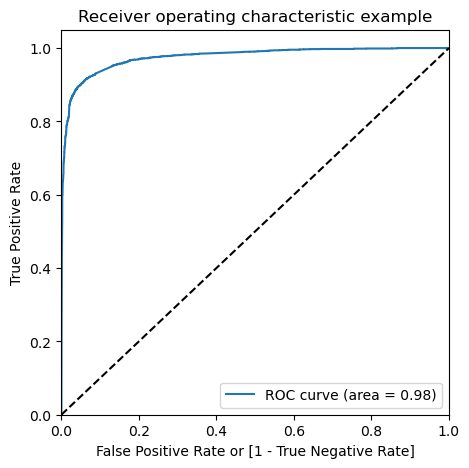

In [112]:
draw_roc(y_train_pred_final.converted, y_train_pred_final.converted_prob)

#### Threshold determination using ROC

In [113]:
numbers = [float(i/10) for i in range(10)]

for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.converted_prob.map(lambda x : 1 if x > i else 0)

y_train_pred_final.head()

,visitorID,converted,converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3009,3009,0,0.101694,0,1,1,0,0,0,0,0,0,0,0
1012,1012,0,0.068068,0,1,0,0,0,0,0,0,0,0,0
9226,9226,0,0.009200,0,1,0,0,0,0,0,0,0,0,0
4750,4750,1,0.882223,1,1,1,1,1,1,1,1,1,1,0
7987,7987,1,0.998981,1,1,1,1,1,1,1,1,1,1,1


In [114]:
# creating the dataframe that contain prob, accuracy, sensi, speci

cutoff_leads_df = pd.DataFrame(columns = ['prob', 'accuracy', 'sensi', 'speci'])

num = [float(i/10) for i in range(10)]

for i in num:
    cm = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final[i])
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total 
    sensi = cm[1,1] / float(cm[1,1] + cm[1,0])
    speci = cm[0,0] / float(cm[0,0] + cm[0,1])
    cutoff_leads_df.loc[i] = [i, accuracy, sensi, speci]

cutoff_leads_df

,prob,accuracy,sensi,speci
0.0,0.0,0.385136,1.000000,0.000000
0.1,0.1,0.860337,0.971791,0.790525
0.2,0.2,0.897182,0.953802,0.861716
0.3,0.3,0.926153,0.918234,0.931114
0.4,0.4,0.931034,0.901472,0.949552
0.5,0.5,0.933239,0.886345,0.962612
0.6,0.6,0.931979,0.868357,0.971831
0.7,0.7,0.926626,0.842191,0.979513
0.8,0.8,0.910723,0.790270,0.986172
0.9,0.9,0.893718,0.739166,0.990525


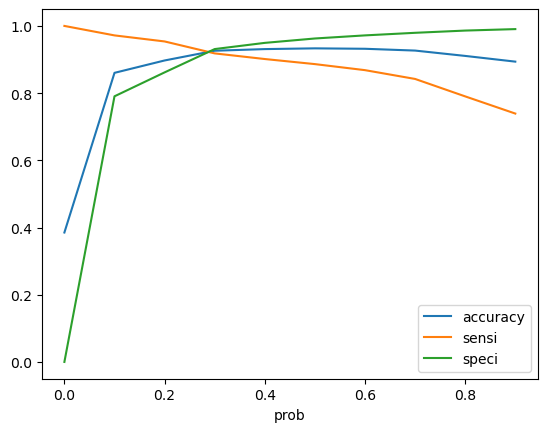

In [115]:
cutoff_leads_df.plot.line(x = 'prob', y = ['accuracy', 'sensi', 'speci'])
plt.show()

 therefore, 0.3 is our ideal cut-off

In [116]:
y_train_pred_final['final_predicted'] = y_train_pred_final.converted_prob.map(lambda x : 1 if x > 0.3 else 0)
y_train_pred_final.head()

,visitorID,converted,converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
3009,3009,0,0.101694,0,1,1,0,0,0,0,0,0,0,0,0
1012,1012,0,0.068068,0,1,0,0,0,0,0,0,0,0,0,0
9226,9226,0,0.009200,0,1,0,0,0,0,0,0,0,0,0,0
4750,4750,1,0.882223,1,1,1,1,1,1,1,1,1,1,0,1
7987,7987,1,0.998981,1,1,1,1,1,1,1,1,1,1,1,1


"After considering the accuracy (0.926), sensitivity (0.918), and specificity (0.931) of our model with a cutoff of 0.3, we further evaluated additional metrics to arrive at our best performing model

#### Precision and Recall

In [117]:
# precision
precision = metrics.precision_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)
precision

0.8930417495029821

In [118]:
# recall 
recall = metrics.recall_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)
recall

0.9182338511856092

In [119]:
f1_score = metrics.f1_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)
f1_score

0.9054626083450917

#### plotting precision - recall curve

In [120]:
p, r, thresholds = metrics.precision_recall_curve(y_train_pred_final.converted, y_train_pred_final.converted_prob)

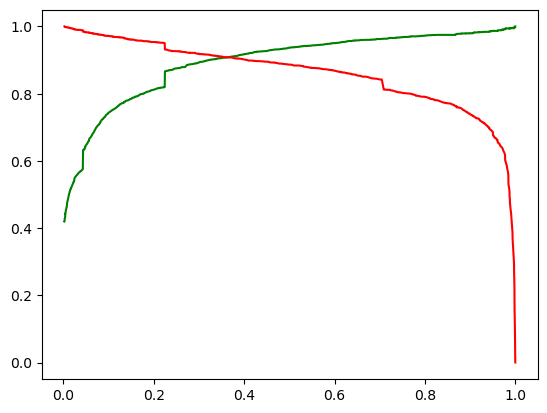

In [121]:
plt.plot(thresholds, p[:-1], 'g-')
plt.plot(thresholds, r[:-1], 'r-')
plt.show()

"Using a low threshold for a model will result in high recall but low precision, while using a high threshold will result in high precision but low recall.

### Step 5 : Predictions on the test set 

In [122]:
# scaling the numerical values of X-test

X_test[numerical_variables_list] = scaler.transform(X_test[numerical_variables_list])

In [123]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
3271,-0.600595,0,0,0,0,0,0,0,0,0,0,0,0,0
1490,1.887326,1,0,0,0,0,0,0,0,0,0,0,0,1
7936,-0.752879,0,0,0,0,0,0,0,0,0,0,0,0,0
4216,-0.888650,0,1,0,0,0,1,0,1,0,0,0,0,0
3830,-0.587751,1,0,0,0,0,0,0,0,0,0,0,0,0


In [124]:
# adding constant 
X_test_sm = sm.add_constant(X_test)

In [125]:
# predicting values 
y_test_pred = res.predict(X_test_sm)

In [126]:
y_test_pred[:10].values.reshape(-1)

array([0.14180626, 0.99445472, 0.12173796, 0.98714539, 0.06465848,
       0.89540733, 0.01314351, 0.01720194, 0.99810724, 0.26985657])

In [127]:
# creating dataframe for y_test_pred
y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df.head()

,0
3271,0.141806
1490,0.994455
7936,0.121738
4216,0.987145
3830,0.064658


In [128]:
# creating dataframe for y_test 
y_test_df = pd.DataFrame(y_test)
y_test_df['visitorID'] = y_test.index
y_test_df.head()

,Converted,visitorID
3271,0,3271
1490,1,1490
7936,0,7936
4216,1,4216
3830,0,3830


In [129]:
# removing index of 2 dataframes in order to merge it 
y_pred_df.reset_index(drop = True, inplace = True)
y_test_df.reset_index(drop = True, inplace = True)

In [130]:
# merging 2 dataframes
y_test_pred_final = pd.concat([y_test_df, y_pred_df], 1)
y_test_pred_final.head()

,Converted,visitorID,0
0,0,3271,0.141806
1,1,1490,0.994455
2,0,7936,0.121738
3,1,4216,0.987145
4,0,3830,0.064658


In [131]:
# renaming the column 
y_test_pred_final = y_test_pred_final.rename(columns = {0 : 'converted_prob'})

In [132]:
# ordering the columns 
y_test_pred_final = y_test_pred_final.reindex(columns = ['visitorID', 'Converted', 'converted_prob'])
y_test_pred_final.head()

,visitorID,Converted,converted_prob
0,3271,0,0.141806
1,1490,1,0.994455
2,7936,0,0.121738
3,4216,1,0.987145
4,3830,0,0.064658


In [133]:
y_test_pred_final['predicted'] = y_test_pred_final.converted_prob.map(lambda x : 1 if x > 0.3 else 0)
y_test_pred_final.head()

,visitorID,Converted,converted_prob,predicted
0,3271,0,0.141806,0
1,1490,1,0.994455,1
2,7936,0,0.121738,0
3,4216,1,0.987145,1
4,3830,0,0.064658,0


In [134]:
# confusion matrix 
cm = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.predicted)
print(cm)

[[1599  135]
 [ 100  889]]


In [135]:
# accuracy 
accuracy = metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.predicted)
accuracy

0.9136981270657363

In [136]:
# sensitivity
sensitivity = cm[1,1] / float(cm[1,1] + cm[1,0])
sensitivity

0.8988877654196158

In [137]:
# specificty
specificty = cm[0,0] / float(cm[0,0] + cm[0,1])
specificty

0.9221453287197232

In [138]:
# precision 
precision = metrics.precision_score(y_test_pred_final.Converted, y_test_pred_final.predicted)
precision

0.8681640625

In [139]:
# recall
recall = metrics.recall_score(y_test_pred_final.Converted, y_test_pred_final.predicted)
recall

0.8988877654196158

In [140]:
f1_score = metrics.f1_score(y_test_pred_final.Converted, y_test_pred_final.predicted)
f1_score

0.8832588176850472

### Result Outcomes

#### Following are the results obtained on train set for the ideal cutoff of 0.3

1. Accuracy - 92.6% 
2. Sensitivity - 91.8%
3. Specificity - 93.1%
4. Precision - 89.3%
5. Recall - 91.8%
6. F1_score - 90.5%

#### Following are the results obtained on test set for the ideal cutoff of 0.3

1. Accuracy - 91.4% 
2. Sensitivity - 89.8%
3. Specificity - 92.2%
4. Precision - 86.8%
5. Recall - 89.8%
6. F1_score - 88.3%

The evaluation of the model using the ideal cutoff of 0.3 on both the train and test sets showed promising results. The model performed well in terms of accuracy, sensitivity, specificity, precision, recall, and F1_score.

#### The analysis identified the top three variables that significantly contribute to lead conversion probability are

 1. "Tags_Closed by Horizzon" (7.05)
 2. "Tags_Lost to EINS" (6.31) 
 3. "Tags_Will revert after reading the email" (5.01)

#### Some of the other important variables are 

1. Lead Source_Welingak Website (3.80)
2. Last Activity_SMS Sent (2.11)
3. Lead Origin_Lead Add Form (1.28)

## Conclusion

The company should concentrate on the following important elements to improve lead conversion rate, according to the findings of the logistic regression model:


1. Tags_Closed by Horizzon: Leads that have been assigned Tags as ‘closed by 
horizon’ are the ones with the highest conversion rates.





2. Tags_Lost: Leads that have been tagged as ‘Lost ‘also contribute to the conversion 
to a considerable extent.



3. Tags_Will revert after reading the email: Leads that have been tagged as ‘will 
revert after reading the mail’ also have significant correlation with the conversion.




4. Other factors that have a good effect on conversion rates include the overall time spent on the website, lead origin from landing page submission, lead source from the business website, Olark Chat, and Last Activity from SMS Sent.





5. The company should prioritize leads whose lead source is from "Welingak Website" and generate as many leads as possible through this region.




6. In order to enhance visitor experience, lengthen time spent on the platform, and increase lead conversion rates, it is also advisable to ask the development team to improve the user interface of the company's app.





7. These actions will help the company increase lead conversion rates and boost the return on investment from its marketing initiatives.
